# Short Project 1: Porsche Taycan

### 1. Introduction

I picked the Porsche Taycan as my example used car. I got the data from cars.com. My procedure for choosing the cars was to remove all filters so that the listings would appear at random. Then I selected the top 30 listings while noting the age, miles, and price of the cars. My data is stored in a csv filed called "Porsche Taycan Data.csv"

In [1]:
taycan = read.csv("Porsche Taycan Data.csv")

### 2. Summary Statistics

In [2]:
x = taycan$Age
y = taycan$Price
x_y = list(x,y)


cat("\nMeans:")
lapply(x_y, mean)

cat("\nStandard Deviations:")
lapply(x_y, sd)

SSX = sum((x-mean(x))^2)
SSY = sum((y-mean(y))^2)
SSXY = sum((x-mean(x))*(y-mean(y)))

cat("\nSSX, SSY, and SSXY:\n")
cat("\nSSX =", SSX)
cat("\nSSY =", SSY)
cat("\nSSXY =", SSXY)

b1 = SSXY / SSX
b0 = mean(y) - b1 * mean(x)

y_hat = b0 + b1 * x
resid = y - y_hat

SSModel = sum((y_hat - mean(y))^2)
SSE = sum(resid^2)

cat("\n\nSSModel and SSE:\n")
cat("\nSSModel =", SSModel)
cat("\nSSE =", SSE)


Means:

[[1]]
[1] 2.833333

[[2]]
[1] 94119.2


Standard Deviations:

[[1]]
[1] 1.59921

[[2]]
[1] 24663.9


SSX, SSY, and SSXY:

SSX = 74.16667
SSY = 17640924065
SSXY = -757235

SSModel and SSE:

SSModel = 7731301284
SSE = 9909622781

### 3. Least Squares Regression Line

In [3]:
b1 = SSXY / SSX
b0 = mean(y) - b1 * mean(x)
b0
b1

fit = lm(y ~ x)
summary(fit)
coefficients(fit)

[1] 123047.3

[1] -10209.91


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-26423 -13121  -5585   6725  52363 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   123047       7078  17.383  < 2e-16 ***
x             -10210       2184  -4.674 6.76e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18810 on 28 degrees of freedom
Multiple R-squared:  0.4383,	Adjusted R-squared:  0.4182 
F-statistic: 21.85 on 1 and 28 DF,  p-value: 6.763e-05


(Intercept)           x 
  123047.28   -10209.91

<span style="color: blue;"> The negative slope makes sense because the value depreciates over time. <span>

### 4. Estimating Standard Deviation of the Error Term

In [4]:
SSR = b1 * SSXY

sigma_hat = sqrt(SSE / (30 - 2))
SSR
SSE
sigma_hat

# confirmed with lm()
anova(fit)
summary(fit)$sigma


[1] 7731301284

[1] 9909622781

[1] 18812.63

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,7731301284,7731301284,21.84507,6.762802e-05
Residuals,28,9909622781,353915099,NA,NA


[1] 18812.63

### 5. Scatterplot with Regression Line

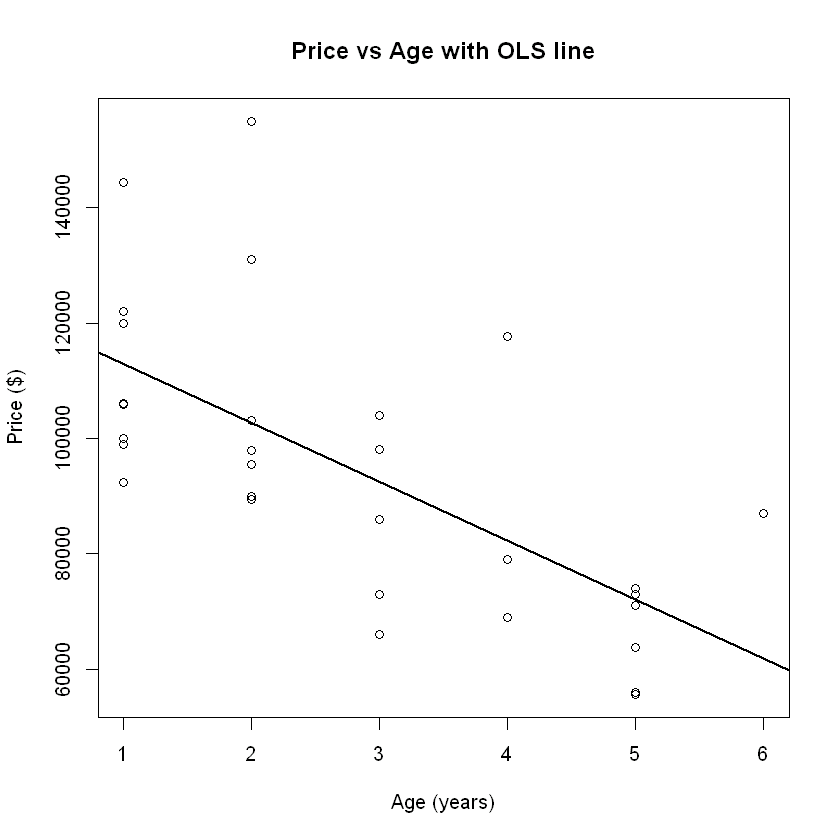

In [5]:
plot(taycan$Age, taycan$Price, xlab="Age (years)", ylab="Price ($)",
     main="Price vs Age with OLS line")
abline(b0, b1, lwd=2)

### 6. Residual Plots

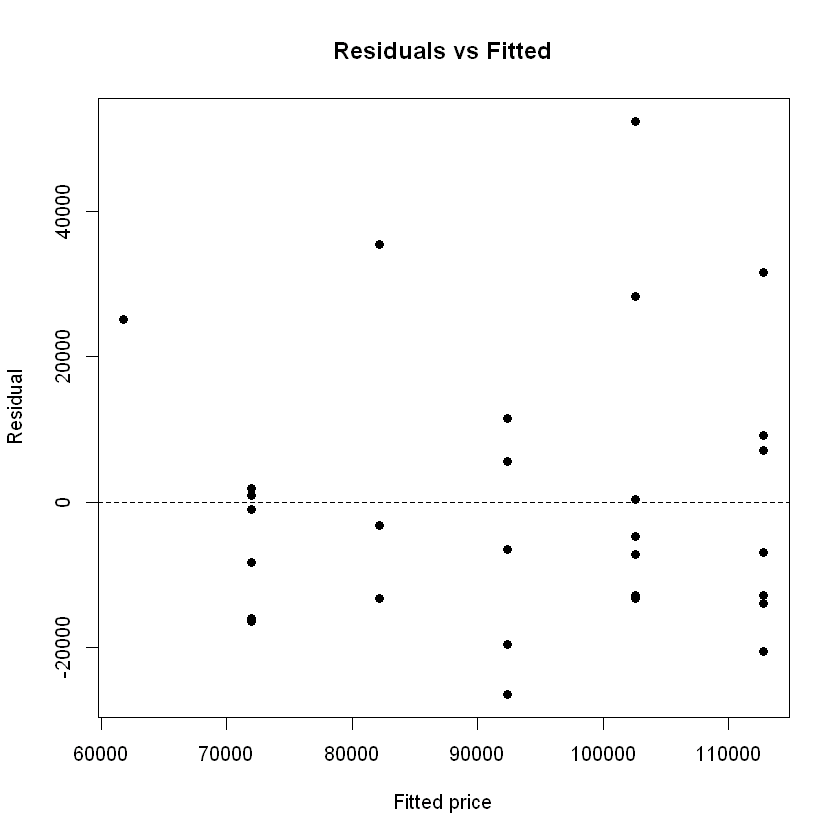

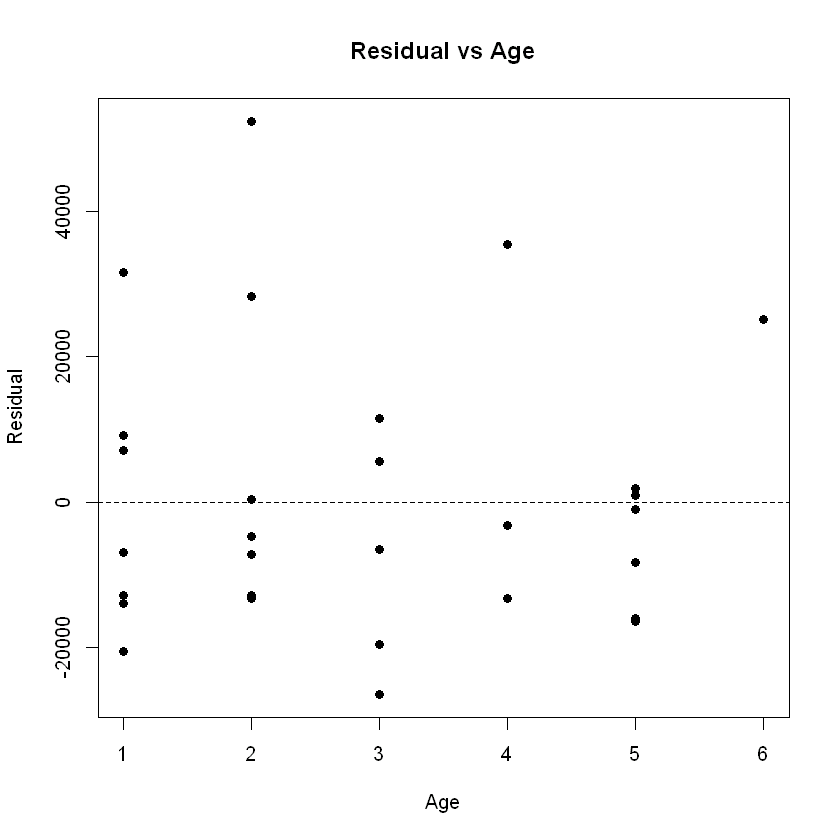

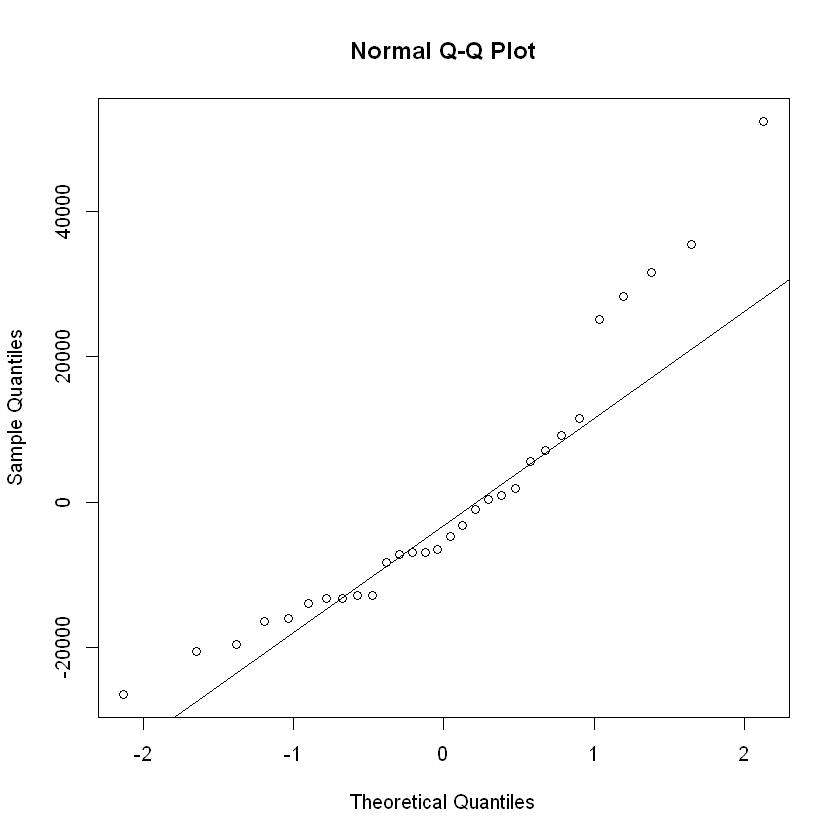

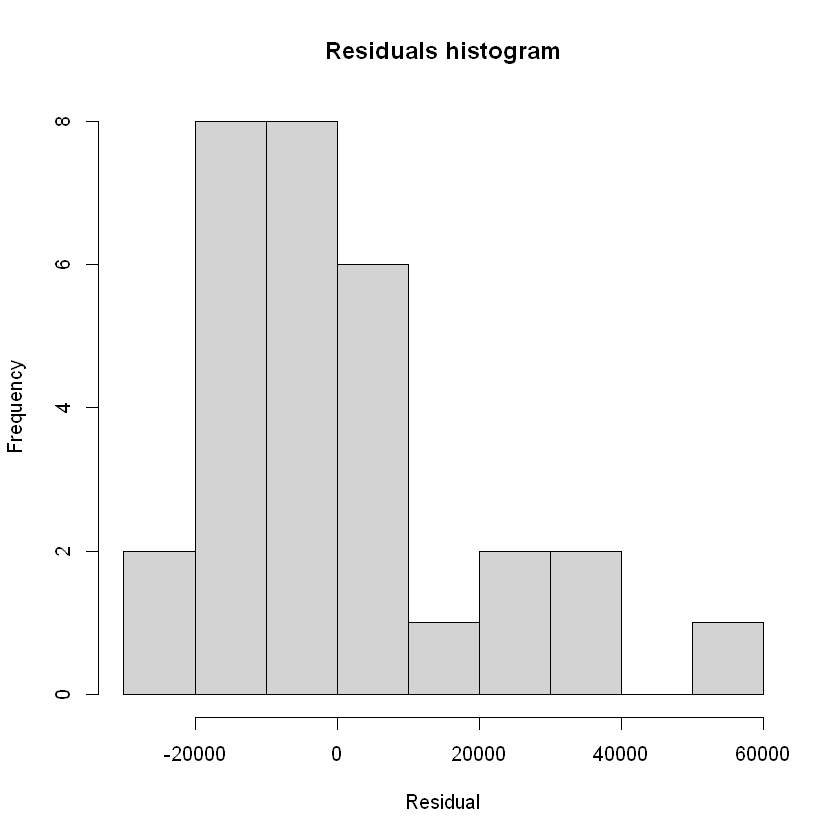

In [6]:
taycan$pred = predict(fit)      
taycan$resid = residuals(fit)      
taycan$std.resid = rstandard(fit)      
taycan$stud.resid = rstudent(fit)      
      
      
plot(taycan$pred, taycan$resid, pch=19, xlab="Fitted price", ylab="Residual",
     main="Residuals vs Fitted")      
abline(h=0, lty=2)      
      
plot(taycan$Age, taycan$resid, pch=19, xlab="Age", ylab="Residual", 
     main="Residual vs Age")      
abline(h=0, lty=2)      
      
qqnorm(taycan$resid)      
qqline(taycan$resid)      
      
hist(taycan$resid, main="Residuals histogram", xlab="Residual")      


<span style="color: blue;">The first plot seems to be pretty randomly scattered around the line, so I'd say the condition for linearity is met.
The second plot seems to be pretty randomly scattered around the line, so I'd say the condition for independence is met.
The third plot seems to have some sort of pattern, so I don't think this meets the condition for normality. However, this data does seem to meet the condition for homoscedasticity, as there is a random scatter of points around zero with no discernible pattern.<span>

### 7. Largest residual

In [11]:
max = which.max(abs(taycan$resid))
max

students = rstudent(fit)
leverages = hatvalues(fit)
cooks = cooks.distance(fit)

taycan$student = students
taycan$h = leverages
taycan$cook = cooks

taycan[max, c("Age","Miles","Price","pred","resid","student","h","cook")]


[1] 29

,Age,Miles,Price,pred,resid,student,h,cook
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,2,2902,154990,102627.5,52362.54,3.313004,0.04269663,0.1804707


<span style="color: blue;">The car with the largest residual is car #29. Its residual was 52,362.5, meaning its actual price was much higher than the model predicted. The studentized residual is 3.31, which is greater than 3, so it's considered unusual. The leverage value is 0.043, which is below the common cutoff of 4/n, so this car does not have unusually high leverage. Cook’s distance is 0.18, which is below the rough threshold of 4/n (about 0.13 with 29 cars), but still moderately large. This suggests the point is an outlier in price but not highly influential on the regression line.<span>

### 8. Compute and interpret a 90% confidence interval for the slope of your model.

In [7]:
se_b1 = summary(fit)$coefficients[2, 2]

b1 = summary(fit)$coefficients[2, 1]

n = nrow(taycan)
tcrit = qt(0.95, df = n - 2)

lower = b1 - tcrit * se_b1
upper = b1 + tcrit * se_b1
c(lower, upper)


[1] -13925.972  -6493.848

<span style="color: blue;">We can be 90% confident that the true value of the slope is in between the range, -13077.08 to -7342.74. <span>

### 9. Compute the Value of r^2

In [13]:
r = cor(taycan$Age, taycan$Price)
r2_via_r = r^2
r2_via_r


anova_fit = anova(fit)

SSR = anova_fit[1, "Sum Sq"]
SSE = anova_fit[2, "Sum Sq"]
SST = SSR + SSE

r2_via_ss = SSR / SST
r2_via_ss


[1] 0.4382594

[1] 0.4382594

<span style="color: blue;">The coefficient of determination is R^2 = 0.438. This means that about 43.8% of the variation in used car prices can be explained by the age of the car in our model. The remaining variation is due to other factors not mentioned here, like mileage, condition, or location.<span>

### 10. Test the strengths of the linear relationsip.

In [14]:
r = cor(taycan$Age, taycan$Price)
t_cor = r * sqrt((n-2) / (1 - r^2))
p_cor = 2 * pt(-abs(t_cor), df=n-2)
t_cor; p_cor



t_slope = b1 / se_b1
p_slope = 2 * pt(-abs(t_slope), df=n-2)
t_slope; p_slope


anova_fit = anova(fit)
MSR = anova_fit[1, "Mean Sq"]
MSE = anova_fit[2, "Mean Sq"]
Fval = MSR / MSE
p_F = pf(Fval, df1 = 1, df2 = n - 2, lower.tail = FALSE)
Fval
p_F

[1] -4.673871

[1] 6.762802e-05

[1] -4.673871

[1] 6.762802e-05

[1] 21.84507

[1] 6.762802e-05

<span style="color: blue;">For all three tests (correlation, slope, and ANOVA), the results were consistent. The test statistics were large in magnitude (t=−4.67, F=21.85) and the p-values were extremely small (p ≈ 6.8 * 10^−5 ). Since the p-values are below 0.05, we reject the null hypothesis. There is strong evidence of a significant negative linear relationship between car age and price.<span>

### 11. Choose a Particular Age

In [21]:
age0 = 3
yhat = predict(fit, newdata=data.frame(Age=age0), se.fit=TRUE)

pred_value = as.numeric(yhat$fit)
se_mean = as.numeric(yhat$se.fit)

tcrit = qt(0.95, n-2)

lower_mean = pred_value - tcrit * se_mean
upper_mean = pred_value + tcrit * se_mean

pred_se_for_individual = sqrt( yhat$se.fit^2 + summary(fit)$sigma^2 )
lower_pred = pred_value - tcrit * pred_se_for_individual
upper_pred = pred_value + tcrit * pred_se_for_individual

list(
  Age = age0,
  Predicted_Value = round(pred_value, 2),
  CI90_for_Mean = c(lower=round(lower_mean, 2), upper=round(upper_mean, 2)),
  PI90_for_Individual = c(lower=round(lower_pred, 2), upper=round(upper_pred, 2))
)



$Age
[1] 3

$Predicted_Value
[1] 92417.55

$CI90_for_Mean
   lower    upper 
86541.94 98293.16 

$PI90_for_Individual
   lower    upper 
 59879.9 124955.2

<span style="color: blue;">For a 3-year-old car, the model predicts an average price of about 24,170. The 90% confidence interval for the mean price is 19,440 to 29,316, while the 90% prediction interval for an individual car’s price is 9,900 to 24,955. This shows that the average can be estimated pretty accurately, but individual cars may vary much more.<span>

### 12. Free Car Phenomenon 

In [40]:
free_age = -b0 / b1
free_age

[1] 12.05175

<span style="color: blue;">This suggests that a linear model might not be completely accurate, as the price would have to plateau at some point. A car (and especially not a Porsche) wouldn't just free, even if it was 12 years old.<span>

### 13. Conclusion

<span style="color: blue;">Overall, the linear model does a pretty good job of describing how car prices decrease with age. The negative slope makes sense, since cars generally lose value over time, and the R² value shows that a decent portion of the variation in prices is explained by age alone. However, there are still other factors that could imapct the price like mileage, condition, or seller differences. A few cars had unusually large residuals, but they didn't affect the model too much. The Residual plots showed that even though the relationship is mostly linear, the spread of residuals increases for older cars. This makes it more difficult to predict price once cars reach a certain age. This could just be because there weren't that many older cars in my data set, as they were less available on cars.com.<span>